## Plotting results.csv

Jim Mahoney | March 1 2018

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv, os
% matplotlib inline

os.sys.version

'2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

First step: read in the data, and store it in a way that we have (x,y) lists of points to be plotted. 

I'm leaving out the times which were 0.0 : those can't be right, and they can't be put on a log-log plot.

In [58]:
data = {}  # data[algorithm] = {'n': [], 'times[]}
with open('results.csv') as csvfile:
    dictreader = csv.DictReader(csvfile)
    data = {}
    for line in dictreader:
        algorithm = line['algorithm']
        if not algorithm in data:
            data[algorithm] = {'size':[], 'time':[]}
        n = int(line['size'])
        t = float(line['time'])
        if t > 0:
            data[algorithm]['size'].append(n)
            data[algorithm]['time'].append(t)

Here's what we have.

In [59]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(data)

{'bubble': {'size': [30, 90, 270, 810, 2430, 7290, 21870],
            'time': [5e-06,
                     3.5e-05,
                     0.000227,
                     0.001847,
                     0.017849,
                     0.1941,
                     1.76694]},
 'insertion': {'size': [30, 90, 270, 810, 2430, 7290, 21870],
               'time': [2e-06,
                        1e-05,
                        7.8e-05,
                        0.000564,
                        0.004617,
                        0.040285,
                        0.36881]},
 'selection': {'size': [10, 30, 90, 270, 810, 2430, 7290, 21870],
               'time': [1e-06,
                        6e-06,
                        4.9e-05,
                        0.00035,
                        0.002901,
                        0.026486,
                        0.242004,
                        2.166968]}}


And now we plot it.

To see the O() behavior, a log-log plot is the most appropriate.

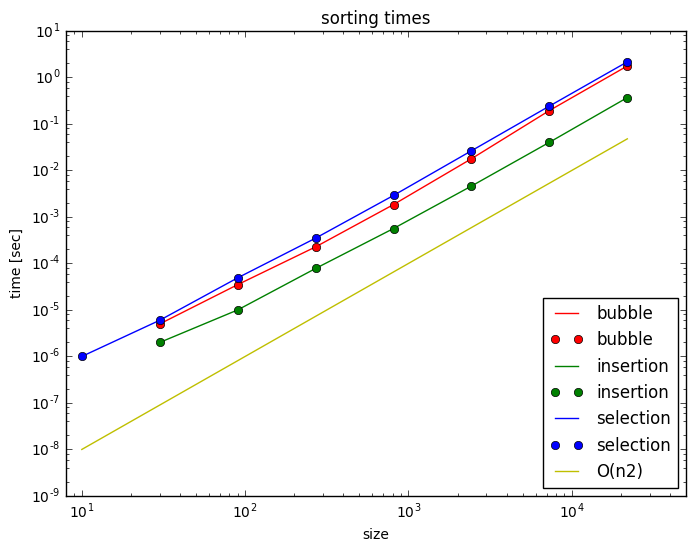

In [60]:
plt.figure(dpi=200, figsize=(8,6)) # plot size in inches
plt.title('sorting times')
plt.xlabel('size')
plt.ylabel('time [sec]')
plt.ylim(1e-9, 10)
plt.xlim(8, 50000)
algos = ['bubble', 'insertion', 'selection']
colors = ['r', 'g', 'b']  # red, green, blue
for i in range(3):
    algo = algos[i]
    x = np.array(data[algo]['size'])
    y = np.array(data[algo]['time'])
    plt.loglog(x, y, colors[i])
    plt.loglog(x, y, colors[i]+'o')
plt.loglog(x, 1e-10 * x*x, 'y')
plt.legend([algos[0], algos[0], algos[1], algos[1], algos[2], algos[2], 'O(n2)'], 
           loc=4)  # location lower right
plt.show()

We see that all three of these algorithms run in $O(n^2)$ time.